**TITLE** 

PRINCIPAL COMPONENT ANALYSIS TO BUID A LINEAR REGRESSION MODEL TO PREDICT TOTAL FERTILITY RATE BASED ON OTHER REGRESSORS USING NFHS 2005-2006 SAMPLED DATA

**INTRODUCTION**

**Unsupervised learning** subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm. In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.

**Types of Unsupervised Learning**

We will look into two kinds of unsupervised learning in this chapter: transformations of the dataset and clustering.

***Unsupervised transformations*** of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data. A common application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with fewer features. A common application for dimensionality reduction is reduction to two dimensions for visualization purposes.

Another application for unsupervised transformations is finding the parts or components that “make up” the data. An example of this is topic extraction on collections of text documents. Here, the task is to find the unknown topics that are talked about in each document, and to learn what topics appear in each document. This can be useful for tracking the discussion of themes like elections, gun control, or pop stars on social media.

***Clustering algorithms,*** on the other hand, partition data into distinct groups of similar items. Consider the example of uploading photos to a social media site. To allow you to organize your pictures, the site might want to group together pictures that show the same person. However, the site doesn’t know which pictures show whom, and it doesn’t know how many different people appear in your photo collection. A sensible approach would be to extract all the faces and divide them into groups of faces that look similar. Hopefully, these correspond to the same person, and the images can be grouped together for you.

***Principal Component Analysis (PCA)***

Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

The PCA involves following step:

1. Dimensionality reduction technique
2. Standardize the data
3. Compute Covariance matrix for variables
4. Claculate eigen values and eigen vectors
5. Sort the eigen values
6. Create principal component and compute the corresponding variation explained.



**OBJECTIVES**

Our main objective is to perform a principal component analysis to build a linear regression model on sampled fertility rate dataset from NFHS 2005-2006.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Loading the functions required for model evaluation
from sklearn.metrics import r2_score, mean_squared_error

**DATA DESCRIPTION**

The dataset considered consist of 29 observations on 11 variables sampled from NFHS 2005-06. The dataset consist of following variables:

Y indicates TFR, dependent variable.

X1 indicates HDI.

X2 indicates Infant mortality rate (IMR).

X3 indicates contraceptive use (any method).

X4 indicates Female Age at marriage.

X5 indicates Median number of months since preceding the birth.

X6 indicates female literacy in percentage.

X7 indicates maternal care.

X8 indicates Male age at marriage.

X9 indicates percent of population with improved water supply.

X10 indicates male literacy in percentage.

Where x1, x2, …, x10 are all independent variables.


In [ ]:
#Loading the required dataset.
NFHS=pd.read_excel("/content/NFHS.xlsx")

#Viewing 'fertility' data set.
NFHS

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,2.13,0.789,39.8,66.9,23.4,33.4,77.3,79.2,15.3,92.1,90.2
1,2.69,0.644,41.7,63.4,41.4,30.4,60.4,42.1,27.7,95.6,83.4
2,1.94,0.681,36.1,72.6,14.4,29.9,79.5,66.0,10.1,88.4,94.0
3,2.38,0.601,44.7,52.6,16.1,32.0,53.9,77.2,14.4,80.8,78.1
4,1.99,0.679,41.7,63.3,21.6,29.7,68.7,56.1,25.3,99.5,82.9
5,3.21,0.537,65.3,47.2,58.4,30.2,36.2,33.9,49.2,81.8,73.9
6,2.55,0.628,41.9,59.3,26.0,32.4,64.6,47.9,18.8,87.4,86.3
7,2.62,0.516,70.8,53.2,50.5,33.0,44.9,41.8,39.9,77.9,74.1
8,3.12,0.488,69.5,55.9,52.6,29.2,44.4,32.6,40.7,74.2,73.5
9,3.82,0.490,72.7,43.6,52.2,29.8,44.8,22.5,40.5,93.7,76.2


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
NFHS.shape

(29, 11)

It is observed that the dataset comprises of 29 records and 11 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
NFHS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       29 non-null     float64
 1   x1      29 non-null     float64
 2   x2      29 non-null     float64
 3   x3      29 non-null     float64
 4   x4      29 non-null     float64
 5   x5      29 non-null     float64
 6   x6      29 non-null     float64
 7   x7      29 non-null     float64
 8   x8      29 non-null     float64
 9   x9      29 non-null     float64
 10  x10     29 non-null     float64
dtypes: float64(11)
memory usage: 2.6 KB


From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
NFHS.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000,29.000000
mean,2.627931,0.628897,47.272414,55.110345,35.434483,32.441379,62.655172,60.42069,22.231034,81.934483,80.817241
std,0.695380,0.112349,15.880894,12.803274,15.792319,3.139099,15.673945,20.28385,12.141932,12.358233,7.798080
min,1.790000,0.449000,15.300000,24.300000,11.400000,28.600000,36.200000,22.50000,2.000000,52.100000,68.500000
25%,2.070000,0.537000,37.500000,48.200000,22.400000,30.200000,52.200000,47.90000,12.800000,76.100000,74.100000
50%,2.480000,0.621000,44.600000,57.600000,37.500000,31.500000,63.800000,56.50000,21.500000,85.000000,78.900000
75%,3.030000,0.684000,61.700000,65.700000,50.500000,33.800000,72.300000,77.20000,27.700000,92.700000,86.300000
max,4.220000,0.920000,72.700000,72.600000,63.700000,41.200000,94.000000,98.10000,49.200000,99.500000,95.500000


Thus, from the above summary, we observed that the 25th percentile of total fertility rate is 2.07 which indicates that 25% of values for total fertility rate is below 2.07 while 75% of values are above 2.07. We also observed that total fertility rate and HDI has same mean and median thus we may assume that  TFR and HDI are normally distributed random variables. We obsereved from the table for all the variables the 75th percentile and maximum value does not have a huge difference therefore we can assume that there does not exist any outliers in the dataset but we will verify the same in the later stage with the help of box and whisker plot. On similar lines we can draw meaningful insights about the other variables using the summary table.

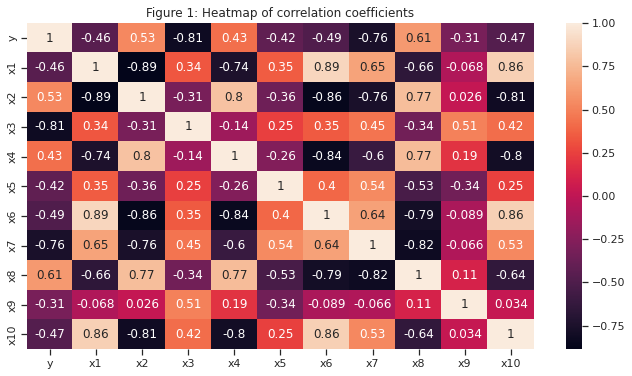

In [ ]:
#Obtaining the heatmap of correlation coefficients of all the variables.
fig=plt.figure(figsize=(25,6))
ax=fig.add_subplot(122)
sns.heatmap(NFHS.corr(), annot = True)
ax.set_title("Figure 1: Heatmap of correlation coefficients")
plt.show()

From the heatmap, we observe that there exist a highly negative correlation between x1 i.e. HDI and x2 i.e. Infant mortality rate,x1 i.e. HDI and x4 i.e. Female Age at marriage, x1 i.e. HDI and x8 i.e. Male age at marriage,x2 i.e. Infant mortality rate and x6 i.e. female literacy in percentage,x2 i.e. Infant mortality rate and x7 i.e. maternal care,x4 i.e. Female Age at marriage and x6 i.e. female literacy in percentage,x4 i.e. Female Age at marriage and x7 i.e. maternal care,x6 i.e. female literacy in percentage and x8 i.e. Male age at marriage,x7 i.e. maternal care and x8 i.e. Male age at marriage which means as the one variable increases the other decreases and highly positive correlation between x1 i.e. HDI and x6 i.e. female literacy in percentage,x7 i.e. maternal care and x1 i.e. HDI ,x2 i.e. Infant mortality rate and x4 i.e. Female Age at marriage,x2 i.e. Infant mortality rate and x8 i.e. Male age at marriage,x4 i.e. Female Age at marriage and x8 i.e. Male age at marriage,x6 i.e. female literacy in percentage and x7 i.e. maternal care which means as the one regressor variable increases the other also increases. Since there exist some correlation between the regressors it indicates the presence of multicolinearity. Thus we can go for PCA for the data reduction and further proceed with building a multiple linear regression model for predicting total fertility rate.

Text(0.5, 1.0, 'Figure 2: Scatter Plot Matrix')

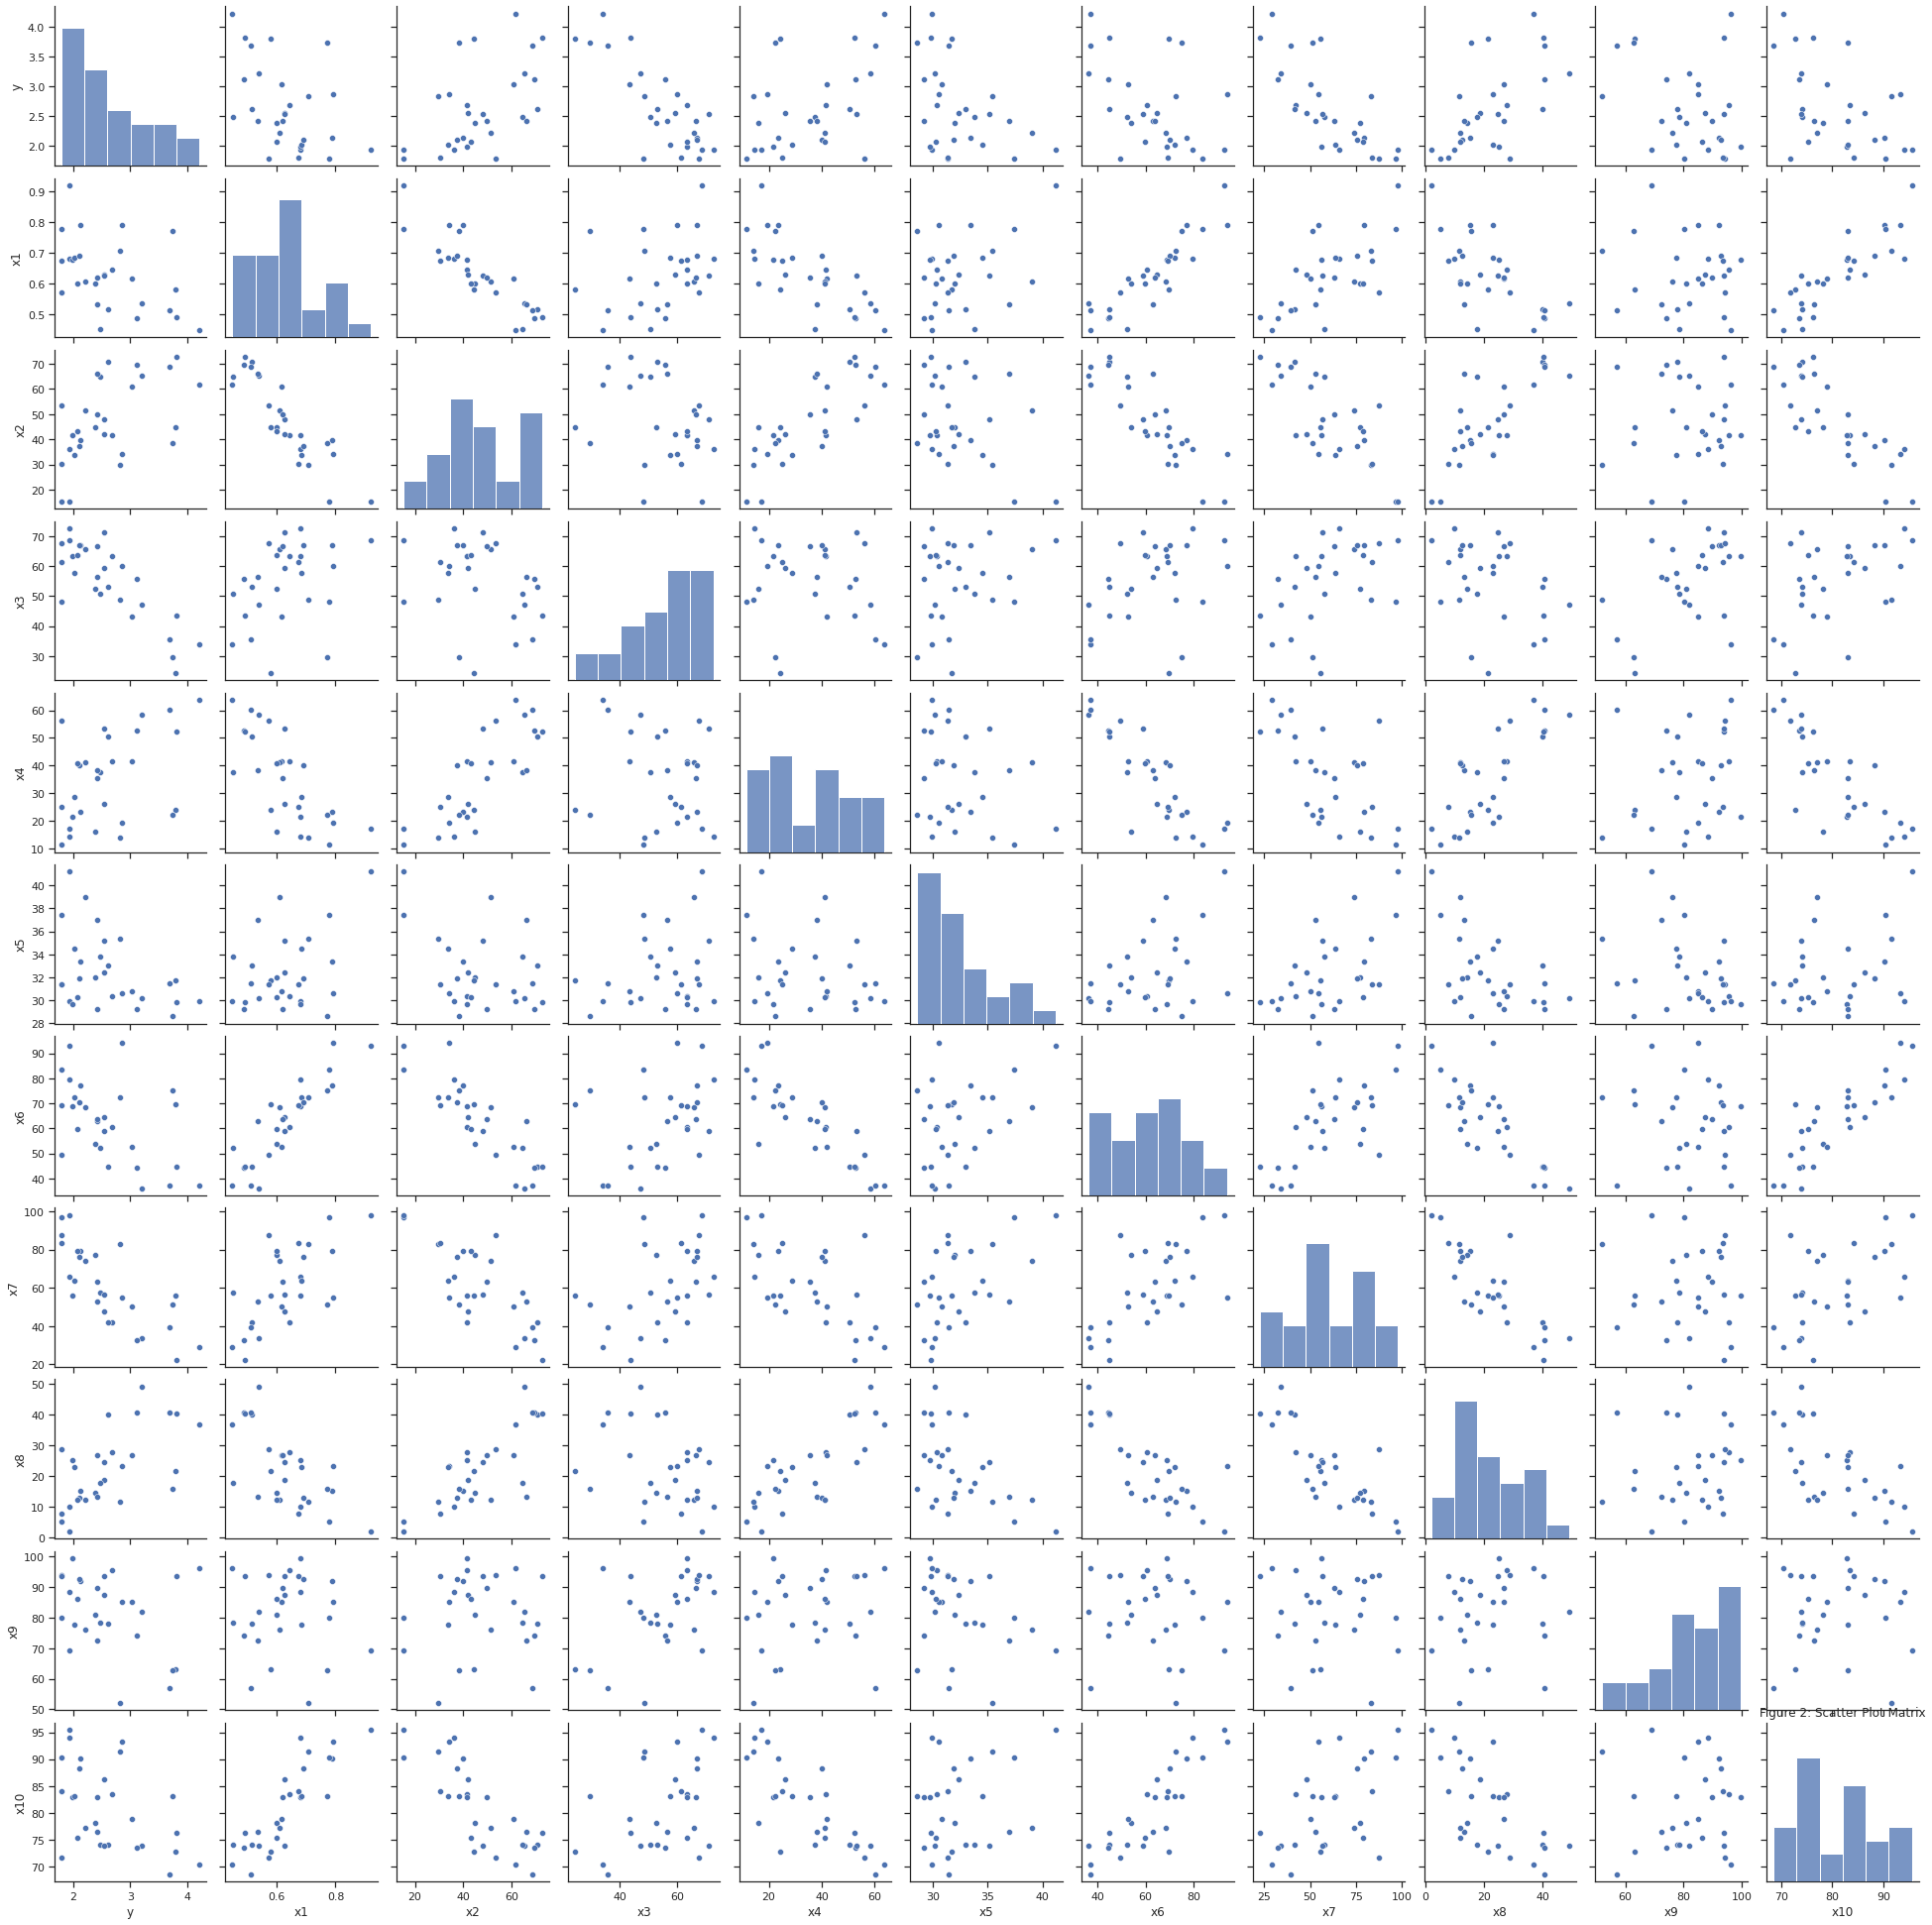

In [ ]:
#Obtaining the scatterplot matrix for all the variables under study.
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(NFHS)
plt.title('Figure 2: Scatter Plot Matrix')

Text(0, 0.5, 'Total Fertility Rate')

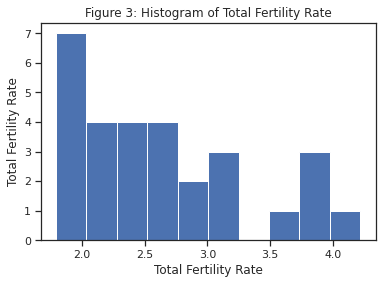

In [ ]:
#Histogram for Total Fertility Rate
plt.hist(NFHS['y'])
plt.title('Figure 3: Histogram of Total Fertility Rate')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Total Fertility Rate')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Total Fertility Rate')

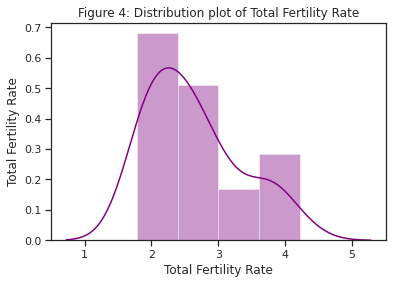

In [ ]:
#Distribution plot for Total Fertility Rate
sns.distplot(NFHS['y'], color = 'purple')
plt.title('Figure 4: Distribution plot of Total Fertility Rate')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Total Fertility Rate')

Thus, from the above histogram and distribution plot (Figure 2 & Figure 3 respectively) it is observed that the data of the total fertility rate is rightly skewed.

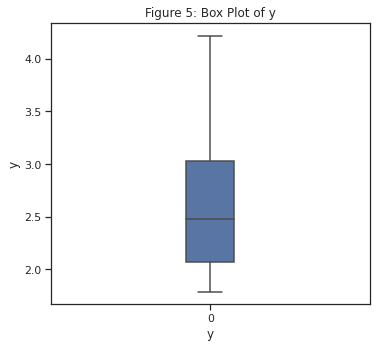

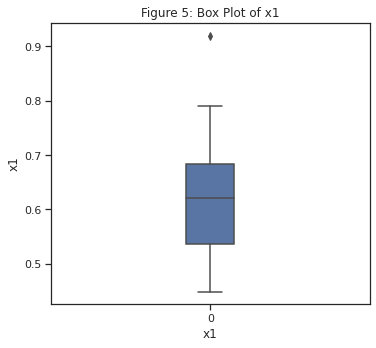

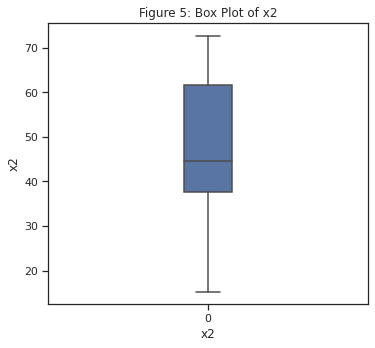

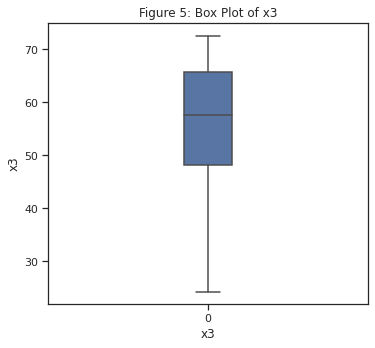

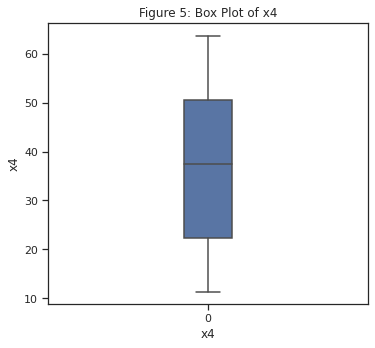

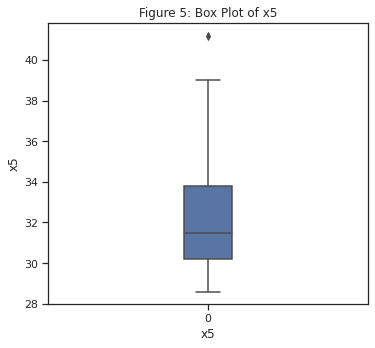

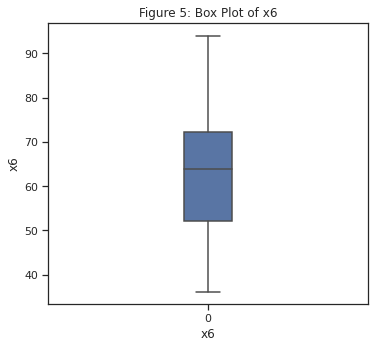

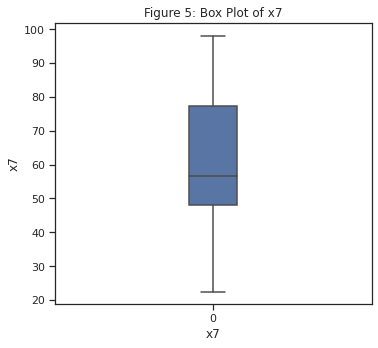

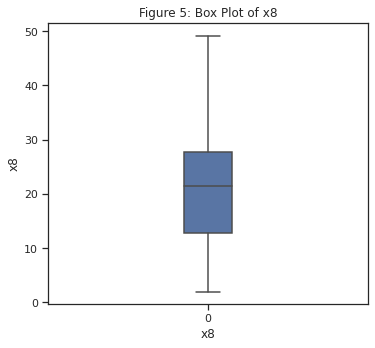

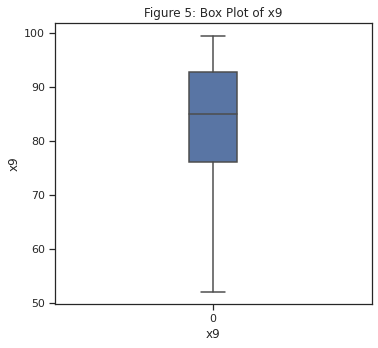

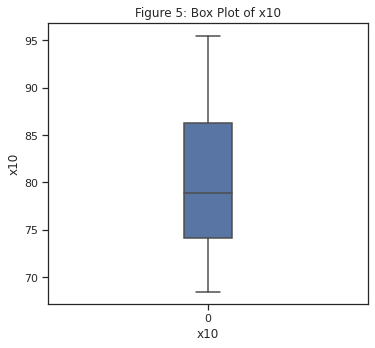

In [ ]:
#Here we obtain the boxplot for the variables to check for the outliers of the data.
data=NFHS.columns
data
value=data[0:11]
value
for i in value:
  fig=plt.figure(figsize=(10,5))
  ax=fig.add_subplot(122)
  sns.boxplot(data=NFHS[i],palette='deep',width=0.15,ax=ax)
  ax.set_title("Figure 5: Box Plot of "+i)
  ax.set_xlabel(i)
  ax.set_ylabel(i)
  plt.tight_layout()
  plt.show()

Thus, from the above boxplots for each variable in (Figure 5) it is observed that there does not exists many outliers in the data. Hence we can go for further analysis for the dataset.

**ANALYSIS**

In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X=NFHS.drop(['y'],axis=1)

#Extracting the variable y i.e. independent variable.
y=NFHS["y"]

MULTIPLE LINEAR REGRESSION MODEL WITH PCA

Here the original data set contains 10 indpendent variables x1, x2, ..., x10 and one continuous study variable y.
The logisitc regression can be built with all these 30 features.

We have already observed from figure 1 that there is a high correlation among variables and multicollinearity is present. Now we proceed for the further analysis.

In [ ]:
#Here we perform the first step in PCA that is standardizing the data.

#Importing standardscalar module
from sklearn.preprocessing import StandardScaler

#Standardize features by removing the mean and scaling to unit variance.
scalar = StandardScaler()

#Fitting
scalar.fit(X)
X_scaled = scalar.transform(X)

In [ ]:
#The rest of the steps will be performed by an inbuilt function.
#Importing PCA
from sklearn.decomposition import PCA

#Performing PCA for data reduction and choosing 2 pca components.
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Obtaining the PCA components with corresponding values
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
df_comp.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.370456,-0.380658,0.178508,-0.352490,0.207837,0.384265,0.335467,-0.360403,-0.033666,0.356832
1,-0.013661,0.010072,-0.583840,-0.139047,0.252570,0.015720,-0.010932,-0.068008,-0.746922,-0.113278
2,-0.188965,0.139897,0.370831,0.292898,0.684374,-0.157218,0.341787,-0.171865,-0.057761,-0.280425
3,-0.298663,-0.126992,-0.262628,-0.192883,-0.365017,-0.177841,0.488937,-0.448871,0.208180,-0.373827
4,-0.477065,0.434945,0.290889,-0.473461,-0.018227,0.110930,-0.314511,-0.344185,-0.118927,0.174036


Text(0.5, 1.0, 'Figure 6: Heatmap of PCA Components')

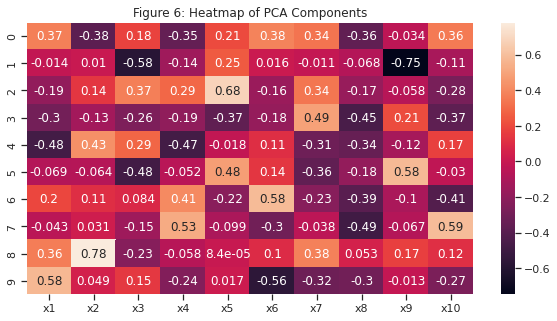

In [ ]:
#Obtaining the heatmaps of all the PCA components for correlation analysis
plt.figure(figsize=(10,5))
sns.heatmap(df_comp, annot=True)
plt.title('Figure 6: Heatmap of PCA Components')

In [ ]:
#The explained variance ratio is the percentage of variance that is attributed by each of the selected components.
#Here we get the explained ratio percentage
print(pca.explained_variance_ratio_ * 100)

[59.70473167 15.59390556 10.8755077   4.73757177  2.96935134  2.70652098
  1.25853155  0.92949414  0.76587787  0.45850742]


In [ ]:
#Here we obtain the cumulative explained ratio percentage.
print(np.cumsum(pca.explained_variance_ratio_ * 100))

[ 59.70473167  75.29863723  86.17414493  90.9117167   93.88106804
  96.58758902  97.84612057  98.77561471  99.54149258 100.        ]


For 80% variation we would choose the number of components to include in our model by adding the explained variance ratio of each component until we reach a total of around 0.8 or 80% to avoid overfitting. Thus from the above calculation of cumulative explained ratio percentage we choose component 1 and component 2, while for 90% variation we can choose 3 components and so on.

In [ ]:
#Thus for 80% variation we choose 2 components
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Transforming the scaled pca components.
X_pca = pca.fit_transform(X_scaled)

Thus, the data has been reduced using principal component analysis.

In [ ]:
#Converting it to a dataframe.
X_pca = pd.DataFrame(X_pca)
y=y

In [ ]:
X_pca

,0,1
0,2.524399,-1.105264
1,-0.416266,-1.512945
2,2.478738,-1.354227
3,0.520111,0.391849
4,0.583492,-1.610554
5,-3.775954,-0.054859
6,0.580615,-0.505463
7,-2.876243,0.267392
8,-3.413105,0.051171
9,-3.691767,-0.555732


Text(0.5, 1.0, 'Figure 7')

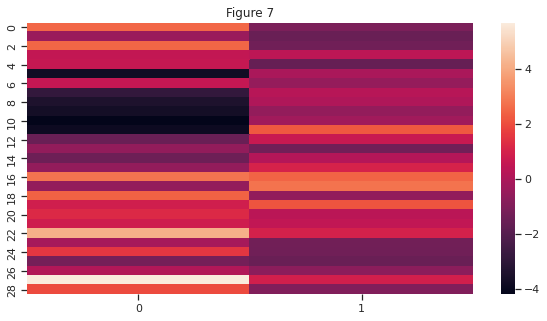

In [ ]:
#Obtaining the heatmaps of all the 2 selected PCA components
plt.figure(figsize=(10,5))
sns.heatmap(X_pca)
plt.title('Figure 7')

In [ ]:
#Importing train_test_split from the sklearn.model_selection library which will help us to split the
#data arrays into two subsets i.e. training data and testing data. 
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the datset into two subsets i.e. training data and testing data.
x_train,x_test,y_train,y_test=train_test_split(X_pca, y, train_size = 0.8, test_size = 0.2, random_state = 10)

Thus, the dataset has been splitted into train and test data.

In [ ]:
#viewing the train data for all the independent variable.
x_train

,0,1
12,-1.511175,0.663966
13,-0.613978,-1.317221
18,2.396400,-0.599881
1,-0.416266,-1.512945
22,4.163390,0.973977
6,0.580615,-0.505463
11,-3.868503,2.225982
23,-0.119780,-1.338354
19,0.880496,2.155959
3,0.520111,0.391849


In [ ]:
#viewing the train data for total fertility rate.
y_train

12    2.48
13    2.54
18    2.86
1     2.69
22    1.79
6     2.55
11    3.69
23    2.42
19    3.74
3     2.38
27    1.93
21    2.22
10    4.22
25    1.79
28    1.80
8     3.12
24    2.11
16    2.83
17    3.80
0     2.13
15    2.42
4     1.99
9     3.82
Name: y, dtype: float64

In [ ]:
#Importing statsmodels.api library from statsmodels package which is required to build the linear regression model.
import statsmodels.api as lm

In [ ]:
x_train_lm=lm.add_constant(x_train)

In [ ]:
#Now we next proceed to build the linear regression model using OLS present in the statsmodels.api.
model=lm.OLS(y_train,x_train_lm).fit()

In [ ]:
#Printing the parameter estimates.
model.params

const    2.686754
0       -0.192897
1        0.249688
dtype: float64

In [ ]:
#Obtaining the summary of the fitted model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     17.33
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           4.30e-05
Time:                        03:37:09   Log-Likelihood:                -13.449
No. Observations:                  23   AIC:                             32.90
Df Residuals:                      20   BIC:                             36.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6868      0.097     27.571      0.000       2.483       2.890
0             -0.1929      0.039     -4.897      0.000      -0.275      -0.111
1              0.2497      0.071      3.492      0.002       0.101       0.399
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.658
Skew:                           0.193   Prob(JB):                        0.720
Kurtosis:                       2.267   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can define principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible. Thus here we have created two principal components which are uncorrelated variables.

From the above summary we observe that the 2nd PCA component contributes more for predicting the total fertility rate that first PCA component.

Thus, from the above summary it is observed that the adjusted r square value for the model is 0.59 which means that the fitted model is good model.

**RESIDUAL ANALYSIS**

Now, since we have the built regression model, now we check the goodness of fit by validating the assumptions associated with the fitted model.
The following are the assumtions regarding the fitted model,
1.	The relationship beetween y and x1,x2,…x5 is linear.
2.	Errors have zero mean.
3.	Assumption of homoscedasticity, i.e. the errors have   constant variance.
4.	Errors are uncorrelated.
5.	Errors are normally distributed random variables.


**1. To check if the relationship beetween y and x1, x2,..., x10 is linear.**

From the scatter plot matrix i.e. figure 2 obtained above we can conclude that the relationship between y and x1, x2,..., x10 is linear.

In [ ]:
#Obtaining residuals corresponding to the fitted regression model.
y_train_pred = model.predict(x_train_lm)
resid = (y_train - y_train_pred)

Thus, residual of the fitted model are obtained above.

 **2. To check if the mean of the residuals is 0.**

In [ ]:
#Obtaining the mean of the residuals
import statistics
statistics.mean(resid)

6.178632484870436e-16

From the above calculation we observe that mean of residuals is 0 hence it can be concluded that the errors has mean zero.

**3. To check assumption of homscedasticity i.e. variance of residuals is constant.**

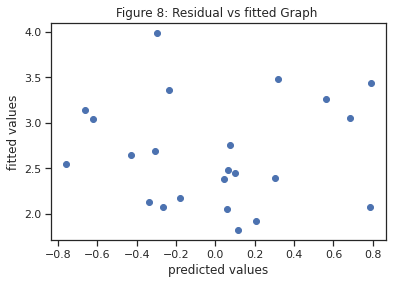

In [ ]:
#Obtaining the scatterplot between predicted values and residuals 
plt.scatter(resid, y_train_pred)
plt.title("Figure 8: Residual vs fitted Graph ")
plt.xlabel("predicted values")
plt.ylabel("fitted values")
plt.show()

Thus, from the figure 8 it is observed that the points are randomly scattered over the plot hence we conclude that the errors have constant variance.

**4. To check if the errors are uncorrelated.**

From the model summar obtained above in the analysis section it is observed that the durbin watson statistics is 2.242 which means that the errors are uncorrelated. Hence, this assumption is also satisfied.

**5. To check normality assumption i.e to check if the residuals are normally distributed.**

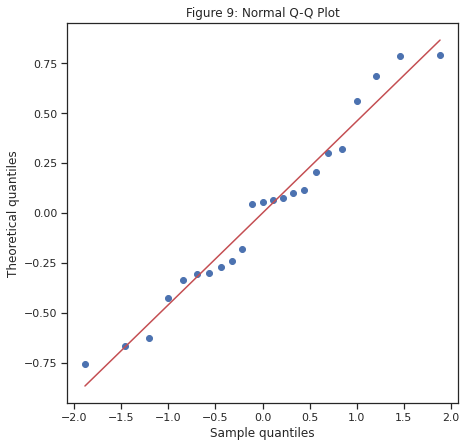

In [ ]:
#Obtaining the Q-Q plot to check for the normality assumption.
import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Figure 9: Normal Q-Q Plot")
plt.xlabel("Sample quantiles")
plt.ylabel("Theoretical quantiles")
plt.show()

Thus it is observed in the above figure (figure 9) that the points does not aligned to the staright line hence we can conclude that the errors are not normallly distributed but sometimes graphical technique does not give accurate result in that case we go for statistical test for more accurate result..

In [ ]:
#Performing the shapiro-wilks test to check for normality assumption.
from scipy import stats
shapiro_test = stats.shapiro(resid)
shapiro_test

(0.9607183337211609, 0.4780258536338806)

Thus, from the above statistical test it is observed that p value = 0.4780 > 0.05 thus we accept the null hypothesis and conclude that the residuals are normally distributed.

Thus, we observe that all the assumptions about errors are satisfied and hence we can say that our model is a good fit.

**PREDICTION USING TEST DATA**

In [ ]:
#Predicting the total fertility rate using the test data.
x_test_lm = lm.add_constant(x_test)
y_test_pred = model.predict(x_test_lm)
y_test_pred

14    3.010150
7     3.308337
5     3.401426
2     1.870478
26    2.473257
20    2.532205
dtype: float64

In [ ]:
#Actual value and the predicted value (Ridge Regression)
pred = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
pred.head()

,Actual value,Predicted value
14,3.03,3.010150
7,2.62,3.308337
5,3.21,3.401426
2,1.94,1.870478
26,2.07,2.473257


Thus, we obtained above the predicted total fertility rate for the given test data.

**CONCLUSION**

We can define principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible. Thus here we have created two principal components which are uncorrelated variables.

From the above summary we observe that the 2nd PCA component contributes more for predicting the total fertility rate that first PCA component.

Thus, from the above summary it is observed that the adjusted r square value for the model is 0.59 which means that the fitted model is good model.

We also observed that all the predicted values for total fertility rate has been predicted almost closer to the actual TFR. Thus the model fitted is a good model.